Required packets

In [13]:
from darts import TimeSeries
from darts.metrics import mape, mse, mae
from darts.models import NaiveMean, NaiveSeasonal, NaiveDrift, NaiveMovingAverage, RandomForest, LinearRegressionModel, AutoARIMA, Theta, StatsForecastAutoETS, Prophet, NBEATSModel, NLinearModel
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import torch

Load dataset as a series and prepare it by splitting into train and test

GPU is not available, using CPU


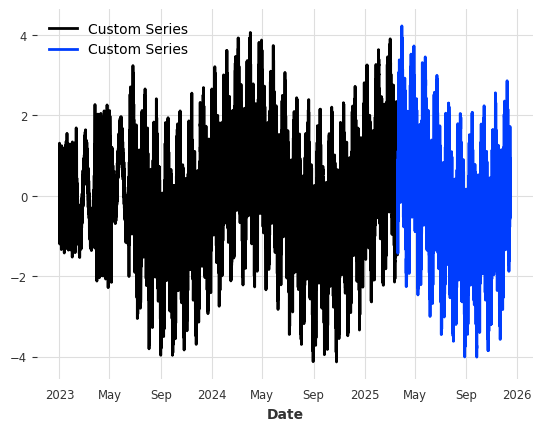

In [14]:
df = pd.read_csv('../dataset/Custom/H_test_noise.csv')
series = TimeSeries.from_dataframe(df, "Date")
train, test = series.split_after(0.75)
train.plot()
test.plot()


df = pd.read_csv("../Dataset Preparation/final_dataset.csv")
series_w = TimeSeries.from_dataframe(df, "Date")
train_w, test_w = series_w.split_after(0.75)


if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU")

## Naive Models - baseline

In [ ]:
model0 = NaiveMean()
model1 = NaiveSeasonal(K = 24)
model2 = NaiveDrift()
model3 = NaiveMovingAverage(input_chunk_length = 24)

models = {
    "Mean": model0,
    "Seasonal": model1,
    "Drift": model2,
    "MA": model3
}

In [ ]:
fig = plt.figure(figsize=(16, 10))
for i, (name, model) in tqdm(enumerate(models.items()), desc="Progress"):
  print(name)
  model.fit(series=train)
  predictions = model.predict(n = len(test))
  mae_score = round(mae(test, predictions), 2)
  mse_score = round(mse(test, predictions), 2)

  fig.add_subplot(2, 2, i+1)
  train.plot(label="train"); test.plot(label="test"); predictions.plot(label=name)
  plt.title(f"Method: {name}, MAE: {mae_score}, MSE: {mse_score} with sample selection"); plt.legend()
fig.tight_layout()
plt.show()

## Classical models

In [17]:
model0 = Theta()
model1 = LinearRegressionModel(lags=24)
model2 = StatsForecastAutoETS()
model3 = AutoARIMA(start_p=2, max_p=12, start_q=1)
model4 = RandomForest(lags=24, n_estimators=300)
model5 = Prophet()

models = {
    #"Theta": model0,
    "Linear": model1,
    "Exponential": model2,
    "ARIMA": model3,
    "RandomForest": model4,
    "Prophet": model5
}

ImportError: The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


ImportError: The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md

In [ ]:
mae_list = []
mse_list = []
fig = plt.figure(figsize=(16, 10))
for i, (name, model) in tqdm(enumerate(models.items()), desc="Progress"):
  print(name)
  model.fit(series=train)
  predictions = model.predict(n = len(test))
  mae_score = round(mae(test, predictions), 5)
  mae_list.append([mae_score, name])
  mse_score = round(mse(test, predictions), 5)
  mse_list.append([mse_score, name])
  # mae_score = mae(test, predictions)
  # mse_score = mse(test, predictions)

  fig.add_subplot(2, 3, i+1)
  train.plot(label="train"); test.plot(label="test"); predictions.plot(label=name)
  plt.title(f"Method: {name} (std)"); plt.legend()
fig.tight_layout()
plt.savefig('w_o.png')
plt.show()

fig = plt.figure(figsize=(16, 10))
for i, (name, model) in enumerate(models.items()):
  print(name)
  model.fit(series=train_w[4376:])
  predictions = model.predict(n = len(test))
  mae_score = round(mae(test, predictions), 5)
  mae_list.append([mae_score, name])
  mse_score = round(mse(test, predictions), 5)
  mse_list.append([mse_score, name])
  # mae_score = mae(test, predictions)
  # mse_score = mse(test, predictions)

  fig.add_subplot(2, 3, i+1)
  train_w.plot(label="train"); test.plot(label="test"); predictions.plot(label=name)
  plt.title(f"Method: {name} with sample selection"); plt.legend()
fig.tight_layout()
plt.savefig('w.png')
plt.show()

In [ ]:
print(mae_list)
print(mse_list)

## Deep Learning models

In [ ]:
model6 = NBEATSModel(
    input_chunk_length = 24,
    output_chunk_length= 4,
    num_stacks = 3,
    num_blocks = 1,
    num_layers = 2,
    layer_widths = 32,
    n_epochs = 50,
    batch_size = 12,
    #pl_trainer_kwargs={"accelerator": "gpu", "devices": -1}
)

model7 = NLinearModel(
    input_chunk_length=24,
    output_chunk_length=4,
    n_epochs=50,
    #pl_trainer_kwargs={"accelerator": "gpu", "devices": -1}
)

models = {
    "NBEATS": model6,
    "NLinear": model7
}

In [ ]:
mae_list = []
mse_list = []
fig = plt.figure(figsize=(16, 10))
for i, (name, model) in enumerate(models.items()):
  print(name)
  model.fit(series=train)
  predictions = model.predict(n = len(test))
  mae_score = round(mae(test, predictions), 5)
  mae_list.append([mae_score, name])
  mse_score = round(mse(test, predictions), 5)
  mse_list.append([mse_score, name])
  # mae_score = mae(test, predictions)
  # mse_score = mse(test, predictions)

  fig.add_subplot(1, 2, i+1)
  train.plot(label="train"); test.plot(label="test"); predictions.plot(label=name)
  plt.title(f"Method: {name}, (std)"); plt.legend()
fig.tight_layout()
plt.savefig('nn_wo.png')
plt.show()

fig = plt.figure(figsize=(16, 10))
for i, (name, model) in enumerate(models.items()):
  print(name)
  model.fit(series=train_w[4375:])
  predictions = model.predict(n = len(test))
  mae_score = round(mae(test, predictions), 5)
  mae_list.append([mae_score, name])
  mse_score = round(mse(test, predictions), 5)
  mse_list.append([mse_score, name])

  fig.add_subplot(1, 2, i+1)
  train.plot(label="train"); test.plot(label="test"); predictions.plot(label=name)
  plt.title(f"Method: {name}, with sample selection"); plt.legend()
fig.tight_layout()
plt.savefig('nn_w.png')
plt.show()

In [ ]:
print(mae_list)
print(mse_list)